# Text analysis workbook


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ICa2nh3mbflJCrJ4oKNUHWTZ9_vTJw8F?usp=sharing) (Fix link later!)

# Part 1: Set-up
At the beginning of this notebook, we need to set up all of the libraries/packages (reusable python-programs other people have written) that we are going to use during. For this we use a common python-package manager called 'pip'. Pip takes care of downloading the right versions, and installing them on our computer, which in this case is a server that's standing in a google

In [ ]:
!pip install pandas
!pip install pyalex
!pip install umap-learn
!pip install datamapplot
!pip install sentence-transformers
!pip install seaborn
!pip install genieclust
!pip install llama-cpp-python


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


ERROR: Could not find a version that satisfies the requirement install (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
ERROR: No matching distribution found for install


# Part 2: Imports

In [14]:

# Our data-handling library:
import pandas as pd

# Our visualisation library:
import matplotlib.pyplot as plt
import seaborn as sns


# Our numerical library:
import numpy as np





import pyalex

# Our mapping library:
import umap
import datamapplot
from utils.openalex_utils import openalex_url_to_pyalex_query, process_records_to_df, get_records_from_dois, openalex_url_to_filename, download_openalex_records

# Part 3: Getting data

## Part 3.1 OpenAlex-datasets.

In [59]:
openalex_url = 'https://openalex.org/works?page=1&filter=title_and_abstract.search:Aristotle,language:languages/en'

dataset_df = download_openalex_records(openalex_url,
                                       reduce_sample=True, 
                                       sample_reduction_method="n random samples", 
                                       sample_size=5000, 
                                       seed_value="42")


# We filter for works that have an abstract:
dataset_df = dataset_df[dataset_df['abstract'].str.len() > 10]

text_data = list(dataset_df['abstract'])
year_data = dataset_df['publication_year']







Input: https://openalex.org/works?page=1&filter=title_and_abstract.search:Aristotle,language:languages/en
Starting data projection pipeline
Filename: title_and_abstract_search_Aristotle__language_languagesen__20250901_163707
Requesting 47775 entries from query 1/1 (expecting to download 5000)...
Attempting PyAlex sampling: 5000 from 47775 (seed=42)
PyAlex sampling successful: got 5000 records (requested 5000)
Query completed in 40.28 seconds
Total records collected: 5000
Expected to download: 5000
Available from all queries: 47775
Sample method used: n random samples
Reduce sample enabled: True
Seed value: 42


We can take a look at the data, by displaying the dataframe-object:

In [60]:
display(dataset_df)

id  \
1     https://openalex.org/W3184653465   
3     https://openalex.org/W2052374753   
4     https://openalex.org/W1504739064   
5     https://openalex.org/W2554112256   
6     https://openalex.org/W2792515143   
...                                ...   
4995  https://openalex.org/W2153812929   
4996  https://openalex.org/W4235271043   
4997  https://openalex.org/W1973147784   
4998  https://openalex.org/W4238021483   
4999  https://openalex.org/W4307022311   

                                                    doi  \
1                 https://doi.org/10.1353/hph.2021.0058   
3                 https://doi.org/10.1353/bhm.2003.0074   
4                                                  None   
5     https://doi.org/10.1093/acprof:oso/97801987906...   
6              https://doi.org/10.1215/00104124-4260409   
...                                                 ...   
4995          https://doi.org/10.1017/s0009840x0029923x   
4996           https://doi.org/10.1017/cbo9780511802058   
4997              https://doi.org/10.1353/hph.2013.0034   
4998  https://doi.org/10.23943/princeton/97806911959...   
4999           https://doi.org/10.5406/19446489.17.3.06   

                                                  title  \
1     Hegel on Possibility, Dialectics, Contradictio...   
3     The Nature of Melancholy: From Aristotle to Kr...   
4     The fuzzy theory and women writers in the late...   
5     Specific Themes: Similarities and Differences ...   
6                               “animi velut respirant”   
...                                                 ...   
4995  Aristotle for the English Reader - Richard Rob...   
4996                      Aristotle: Nicomachean Ethics   
4997  &lt;i&gt;Dialectical Disputations, Volume 1: B...   
4998                                Aristotle Redivivus   
4999  “Bodyheartminding” (<i>xin</i> 心): Reconceivin...   

                                           display_name  relevance_score  \
1     Hegel on Possibility, Dialectics, Contradictio...         0.999950   
3     The Nature of Melancholy: From Aristotle to Kr...         0.999932   
4     The fuzzy theory and women writers in the late...         0.999926   
5     Specific Themes: Similarities and Differences ...         0.999894   
6                               “animi velut respirant”         0.999891   
...                                                 ...              ...   
4995  Aristotle for the English Reader - Richard Rob...         0.897028   
4996                      Aristotle: Nicomachean Ethics         0.897023   
4997  &lt;i&gt;Dialectical Disputations, Volume 1: B...         0.897021   
4998                                Aristotle Redivivus         0.897017   
4999  “Bodyheartminding” (<i>xin</i> 心): Reconceivin...         0.897000   

      publication_year publication_date  \
1                 2021       2021-01-01   
3                 2003       2003-06-01   
4                 2011       2011-09-01   
5                 2016       2016-10-27   
6                 2017       2017-12-01   
...                ...              ...   
4995              1964       1964-06-01   
4996              2000       2000-03-30   
4997              2013       2013-01-01   
4998              2019       2019-11-19   
4999              2022       2022-10-01   

                                                    ids language  \
1     {'openalex': 'https://openalex.org/W3184653465...       en   
3     {'openalex': 'https://openalex.org/W2052374753...       en   
4     {'openalex': 'https://openalex.org/W1504739064...       en   
5     {'openalex': 'https://openalex.org/W2554112256...       en   
6     {'openalex': 'https://openalex.org/W2792515143...       en   
...                                                 ...      ...   
4995  {'openalex': 'https://openalex.org/W2153812929...       en   
4996  {'openalex': 'https://openalex.org/W4235271043...       en   
4997  {'openalex': 'https://openalex.org/W1973147784...       en   
499

# Part 4: Using a language model 
We are now going to use a text-embedding model (a relatively small large language model) to transform the texts into a format which is easier to analyze mathematically. 


(BERT explaination.)  

https://www.sbert.net/docs/sentence_transformer/pretrained_models.html 

In [62]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('thenlper/gte-small')
embeddings = model.encode(text_data,show_progress_bar=True)


Batches: 100%|██████████| 133/133 [00:17<00:00,  7.57it/s]


This is what the resulting embeddings look like:


In [63]:
print(embeddings)

[[-0.05846494 -0.00111581  0.04525318 ...  0.04953647  0.04567572
   0.03310442]
 [ 0.01167493  0.0669638   0.05460947 ... -0.03175354  0.05548828
   0.01166124]
 [-0.04343561 -0.00154702  0.03969203 ...  0.00947071  0.04520118
   0.03408378]
 ...
 [-0.06685364  0.03346677  0.04640706 ...  0.02824249  0.05221841
   0.02611654]
 [-0.00975405  0.01612592  0.02660908 ... -0.02181022  0.02065151
   0.09774167]
 [-0.02689924  0.00505649  0.09876867 ... -0.01226099  0.03792842
   0.05454176]]


# Part 5: doing dimensionality reduction


In [64]:
import umap


reducer = umap.UMAP(n_components=2, random_state=42,metric='cosine')
umap_embeddings = reducer.fit_transform(embeddings)

print(umap_embeddings)


/Users/Noich001/Desktop/workbooks_GAP_workshop/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[[10.720523   -1.5178775 ]
 [12.703027   -0.69795793]
 [ 7.478893   -0.6732479 ]
 ...
 [10.481358   -1.7857007 ]
 [ 9.436026    1.4160981 ]
 [10.711265   -0.7737241 ]]


We can also look at the embeddings as a scatter-plot. Each data-point is one of our texts:

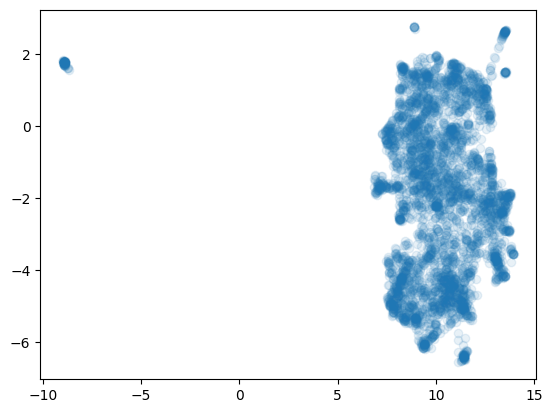

In [65]:
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1],alpha=0.1)
plt.show()

# Part 5: Clustering 

In [70]:
import genieclust
g = genieclust.Genie(n_clusters=10, gini_threshold=0.3)
cluster_labels = g.fit_predict(umap_embeddings)
print(cluster_labels)

[0 1 2 ... 0 9 4]


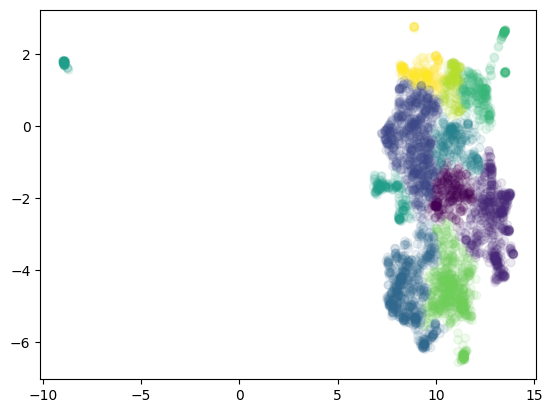

In [74]:
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1],c=cluster_labels,cmap='viridis',alpha=0.1)

<InteractiveFigure width=100% height=800>
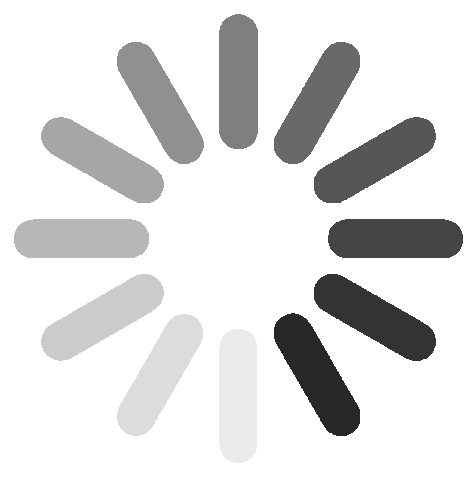

In [94]:
import datamapplot

datamapplot.create_interactive_plot(
    umap_embeddings,
    hover_text=text_data,  # hover_text must be the 2nd positional
  #  np.array([str(x+1) for x in cluster_labels]),  # label layer

)

# Part 6: Labeling clusters

# Part 7: Visualizing